# Covid-19 na mesorregião de Piracicaba
# José Eduardo S. Pimentel - @jespimentel

Dados oficiais de SP: http://www.saude.sp.gov.br/cve-centro-de-vigilancia-epidemiologica-prof.-alexandre-vranjac/areas-de-vigilancia/doencas-de-transmissao-respiratoria/coronavirus-covid-19/situacao-epidemiologica

Fonte do Dataset: https://brasil.io/home/ 

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

covid_total_sp = pd.read_csv('https://brasil.io/dataset/covid19/caso?state=SP&format=csv',parse_dates=['date'])
covid_total_sp.rename(columns={'date':'Data', 'state':'Estado', 'city':'Município', 'place_type':'Tipo_UF', 
                               'confirmed':'Confirmados', 'deaths':'Óbitos', 'is_last':'Último?',
                               'estimated_population_2019':'Popul.(2019)', 'city_ibge_code':'Cod.IBGE',
                               'confirmed_per_100k_inhabitants':'Conf./100mil', 'death_rate':'Índ. mort.'}, 
                              inplace=True)

# Mesorregião pira = micro RC + micro Limeira + micro Pira
# Fonte: https://pt.wikipedia.org/wiki/Lista_de_mesorregiões_e_microrregiões_de_São_Paulo#Mesorregião_de_Piracicaba

micro_rio_claro = ['Brotas', 'Corumbataí', 'Ipeúna', 'Itirapina', 'Rio Claro', 'Torrinha']
micro_limeira = ['Araras', 'Conchal', 'Cordeirópolis', 'Iracamápolis', 'Leme', 'Limeira', 'Santa Cruz da Conceição', 'Santa Gertrudes']
micro_piracicaba = ['Águas de São Pedro', 'Capivari', 'Charqueada', 'Jurumim', 'Mombuca', 'Piracicaba', 'Rafard', 'Rio das Pedras', 'Saltinho', 'Santa Maria da Serra', 'São Pedro', 'Tietê']

meso_piracicaba = micro_rio_claro + micro_limeira + micro_piracicaba
cidades_selecionadas = meso_piracicaba

covid_total_selecao = covid_total_sp[covid_total_sp['Município'].isin(cidades_selecionadas)]

# Pivoteamento dos dados para a obtenção de casos/mortes acumulados (por data)
casos_confirmados = covid_total_selecao.pivot(index='Data', columns='Município', values='Confirmados')
casos_confirmados = casos_confirmados.replace ({np.nan: 0})
mortes = covid_total_selecao.pivot (index = 'Data', columns = 'Município', values = 'Óbitos')
mortes = mortes.replace ({np.nan: 0})
evolucao_estado = covid_total_sp[covid_total_sp['Tipo_UF']=='state']

# Número de dias para a exibição dos dados
casos_grafico = casos_confirmados.tail(14)
mortes_grafico = mortes.tail(14)

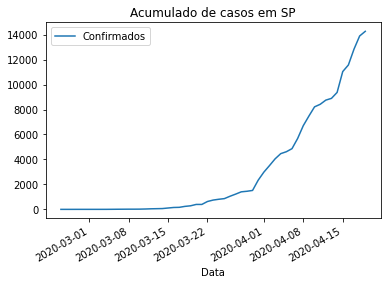

In [2]:
# Acumulado de casos em SP
evolucao_estado.plot (x = 'Data', y = 'Confirmados', title = 'Acumulado de casos em SP')

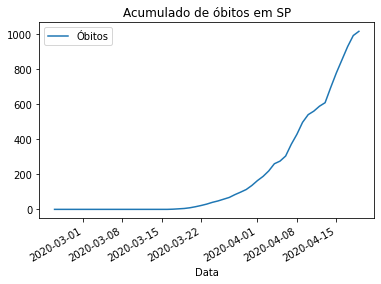

In [3]:
# Acumulado de óbitos em SP
evolucao_estado.plot (x = 'Data', y = 'Óbitos', title = 'Acumulado de óbitos em SP')

In [4]:
# Casos acumulados na mesorregião de Piracicaba nas últimas duas semanas.
casos_grafico

Município,Araras,Leme,Limeira,Piracicaba,Rio Claro,Santa Gertrudes,São Pedro,Águas de São Pedro
Data,,,,,,,,
2020-04-06,0.0,0.0,2.0,8.0,2.0,0.0,1.0,0.0
2020-04-07,2.0,0.0,2.0,10.0,3.0,0.0,1.0,0.0
2020-04-08,2.0,0.0,2.0,12.0,3.0,0.0,1.0,0.0
2020-04-09,2.0,0.0,2.0,12.0,3.0,0.0,1.0,0.0
2020-04-10,3.0,0.0,4.0,12.0,3.0,0.0,1.0,1.0
2020-04-11,3.0,0.0,4.0,12.0,4.0,0.0,1.0,1.0
2020-04-12,3.0,0.0,5.0,13.0,4.0,0.0,1.0,1.0
2020-04-13,3.0,0.0,6.0,13.0,4.0,0.0,1.0,1.0
2020-04-14,3.0,1.0,6.0,16.0,6.0,0.0,1.0,1.0


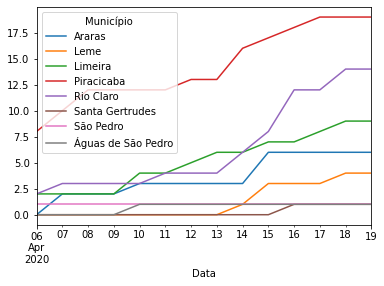

In [5]:
casos_grafico.plot()

In [6]:
# Mortes acumuladas na mesorregião de Piracicaba nas últimas duas semanas
mortes_grafico

Município,Araras,Leme,Limeira,Piracicaba,Rio Claro,Santa Gertrudes,São Pedro,Águas de São Pedro
Data,,,,,,,,
2020-04-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-09,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2020-04-10,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2020-04-11,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2020-04-12,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2020-04-13,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2020-04-14,0.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0


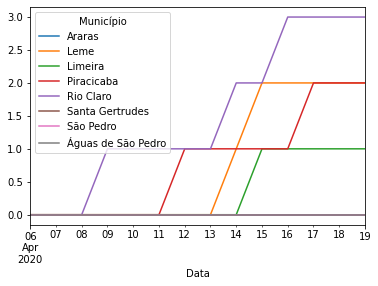

In [7]:
mortes_grafico.plot()